In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [128]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  bag = BaggingRegressor().fit(X_train, y_train)
  print(f'R^2: {bag.score(X_test, y_test)}')

In [129]:
scaler = StandardScaler()

In [130]:
import os
import sys

In [131]:
sys.path.insert(1, os.path.join(sys.path[0], "../notebooks"))

In [132]:
from RidgeRG import RidgeGD

In [133]:
df = pd.read_csv( "../Data/sclaer_dataset_regression.csv" )
df.drop(['Unnamed: 0'], axis=1, inplace=True)
Y = df["price_usd"]
X = df.drop(["price_usd"], axis=1)  

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                                            
                                       test_size = 1 / 3, random_state = 0 )

ridge_gd = RidgeGD(alpha = 0.9)
 
ridge_gd.fit(X_train, Y_train, iter = 500, learning_rate = 0.01)
weights= ridge_gd.thetas

In [134]:
weights

array([ 0.018729  ,  0.01539691,  0.0112699 ,  0.042037  ,  0.01238788,
       -0.01869137,  0.04196469,  0.00979443, -0.00448199,  0.0129254 ,
        0.00891765,  0.00711654,  0.01971875,  0.01973978, -0.02055972,
        0.00169424, -0.01612794,  0.01024276,  0.00052155,  0.01182539,
        0.00877254,  0.01099292,  0.03090608,  0.00909478,  0.0248558 ,
        0.02820269,  0.03782404,  0.02706093,  0.0038221 ,  0.0006772 ])

In [135]:
columns = list(X.columns)

In [136]:
wei_dict = dict(zip(columns, list(weights)))

In [137]:
wei_dict

{'manufacturer_name': 0.018728995272412098,
 'model_name': 0.015396907249876794,
 'transmission': 0.011269897819306065,
 'color': 0.04203700231457132,
 'odometer_value': 0.012387884577815771,
 'year_produced': -0.01869136647379966,
 'engine_fuel': 0.04196469445182318,
 'engine_has_gas': 0.009794429773853187,
 'engine_type': -0.0044819907836866,
 'engine_capacity': 0.012925397392551108,
 'body_type': 0.008917648326740812,
 'has_warranty': 0.00711653564303238,
 'state': 0.019718750626572933,
 'drivetrain': 0.019739783780191908,
 'is_exchangeable': -0.02055972200455686,
 'location_region': 0.0016942387443383109,
 'number_of_photos': -0.016127942186444776,
 'up_counter': 0.01024276317020114,
 'feature_0': 0.0005215543125785876,
 'feature_1': 0.011825386200859852,
 'feature_2': 0.008772537335734801,
 'feature_3': 0.01099292430479311,
 'feature_4': 0.030906082501694496,
 'feature_5': 0.009094781913419656,
 'feature_6': 0.02485580209583757,
 'feature_7': 0.0282026882431162,
 'feature_8': 0.03

In [150]:
res = {k: v for k,v in wei_dict.items() if (0.02 > v > 0.012) or (-0.019 < v < 0)}
res

{'manufacturer_name': 0.018728995272412098,
 'model_name': 0.015396907249876794,
 'odometer_value': 0.012387884577815771,
 'year_produced': -0.01869136647379966,
 'engine_type': -0.0044819907836866,
 'engine_capacity': 0.012925397392551108,
 'state': 0.019718750626572933,
 'drivetrain': 0.019739783780191908,
 'number_of_photos': -0.016127942186444776}

In [139]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 

In [140]:
reg = DecisionTreeRegressor(max_depth=6)
reg.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=6)

<BarContainer object of 29 artists>

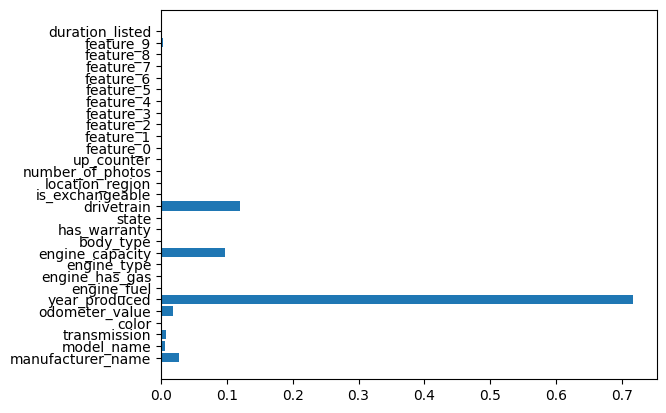

In [141]:
plt.barh(width=reg.feature_importances_, y=X.columns)

In [142]:
from sklearn.feature_selection import RFE

In [143]:
rfe = RFE(estimator=reg, n_features_to_select=5, step=1).fit(X, Y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
X_rfe

,manufacturer_name,odometer_value,year_produced,engine_capacity,drivetrain
0,0.0,0.190000,0.883117,0.294872,0.0
1,0.0,0.290000,0.779221,0.358974,0.0
2,0.0,0.402000,0.766234,0.294872,0.0
3,0.0,0.010000,0.740260,0.358974,0.0
4,0.0,0.280000,0.766234,0.294872,0.0
...,...,...,...,...,...
38526,1.0,0.290000,0.753247,0.423077,0.5
38527,1.0,0.321000,0.805195,0.256410,0.5
38528,1.0,0.777957,0.753247,0.423077,0.5
38529,1.0,0.020000,0.766234,0.230769,0.5


In [144]:
test(X_rfe, Y)

R^2: 0.876038539081031


In [151]:
from sklearn.decomposition import PCA

In [167]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X, Y)
X_pca.shape

(38531, 15)

In [168]:
sum(pca.explained_variance_ratio_)

0.9263848096107926

In [169]:
test(X_pca, Y)

R^2: 0.641128069837057
